# Agricultural data analysis
Source: https://platform.stratascratch.com/data-projects/agricultural-data-analysis

## (1) Imports

In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from ydata_profiling import ProfileReport

%matplotlib inline


## (2) Read in data

In [2]:
crop_raw = pd.read_csv("./Datasets/Crop_recommendation.csv")
print(crop_raw.info())
crop_raw

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]

## (3) EDA

### (3.1) Raw profiling

In [4]:
dfprofile = ProfileReport(crop_raw)
dfprofile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### (3.2) Visualization

#### Distribution of N, P and K

C:\Users\Jerry_Dell_7060\AppData\Local\Temp\ipykernel_28380\2255567241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(crop_raw, x="N", y="label", inner="quart", orient="h", palette = 'Set2')


<Axes: xlabel='N', ylabel='label'>

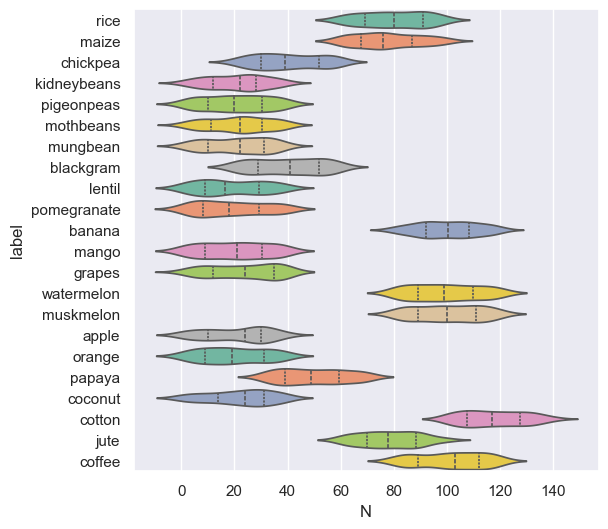

In [52]:
plt.figure(figsize=(6, 6))
sns.violinplot(crop_raw, x="N", y="label", inner="quart", orient="h", palette="Set2")

C:\Users\Jerry_Dell_7060\AppData\Local\Temp\ipykernel_28380\4083170050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(crop_raw, x="P", y="label", inner="quart", orient="h", palette = 'Set2')


<Axes: xlabel='P', ylabel='label'>

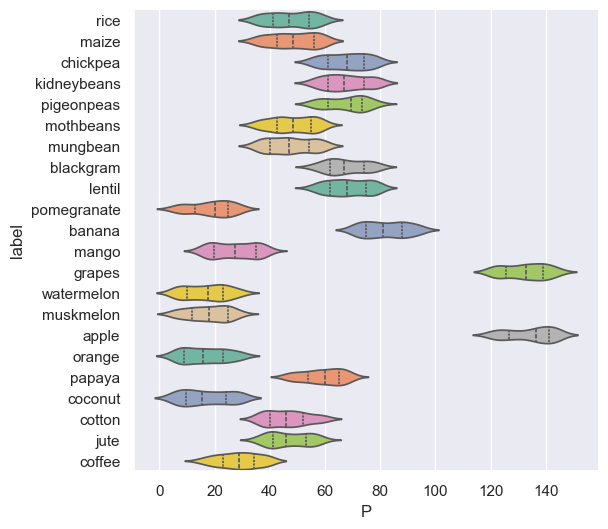

In [51]:
plt.figure(figsize=(6, 6))
sns.violinplot(crop_raw, x="P", y="label", inner="quart", orient="h", palette="Set2")

C:\Users\Jerry_Dell_7060\AppData\Local\Temp\ipykernel_28380\1479234611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(crop_raw, x="K", y="label", inner="quart", orient="h", palette="Set2")


<Axes: xlabel='K', ylabel='label'>

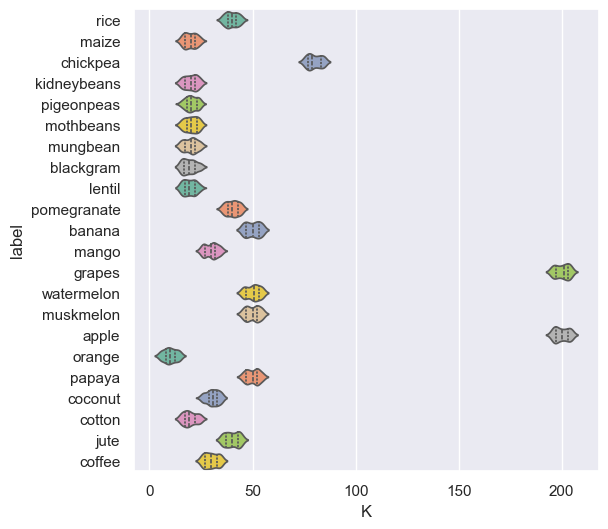

In [68]:
plt.figure(figsize=(6, 6))
sns.violinplot(crop_raw, x="K", y="label", inner="quart", orient="h", palette="Set2")

#### Distribution of Temp, Humidity, pH and rainfall

In [77]:
crop_raw.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

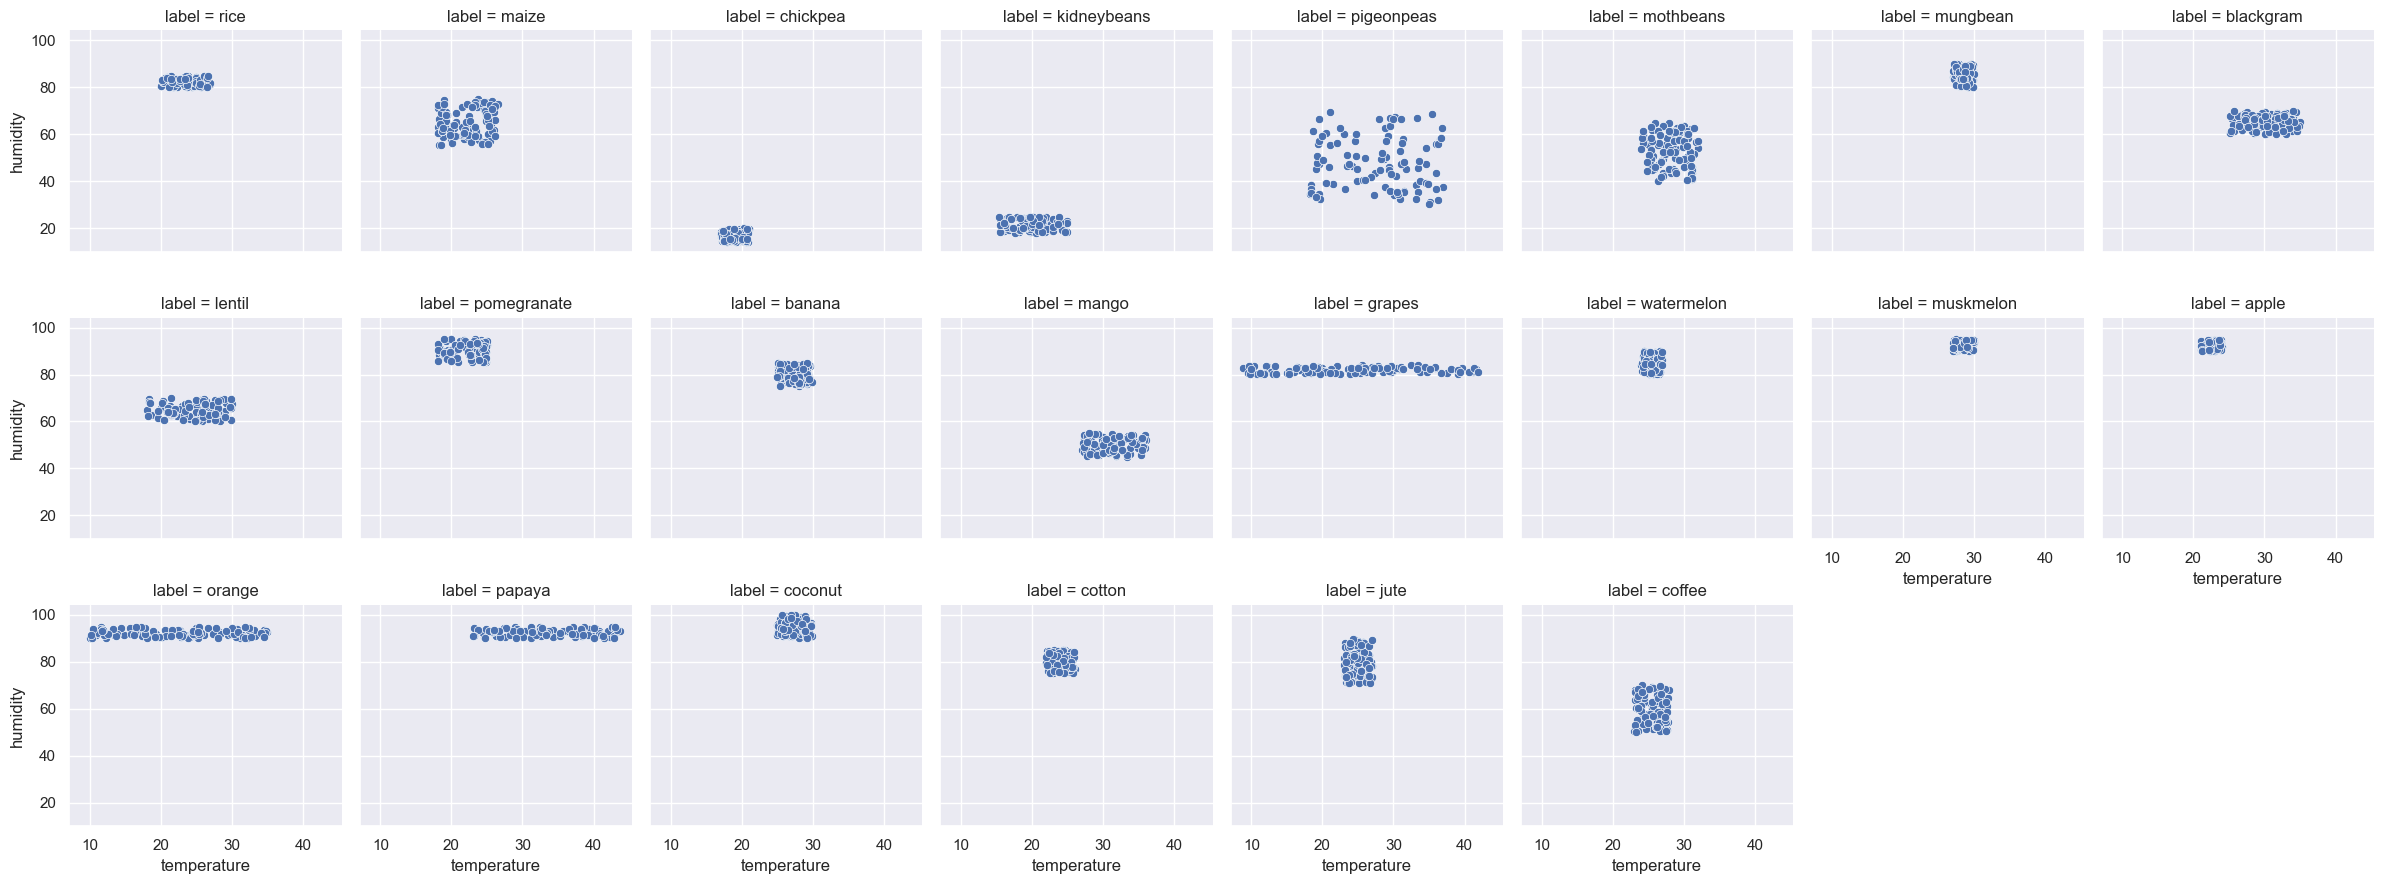

In [88]:
grid = sns.FacetGrid(crop_raw, col="label", col_wrap=8)
grid.map(sns.scatterplot, "temperature", "humidity")

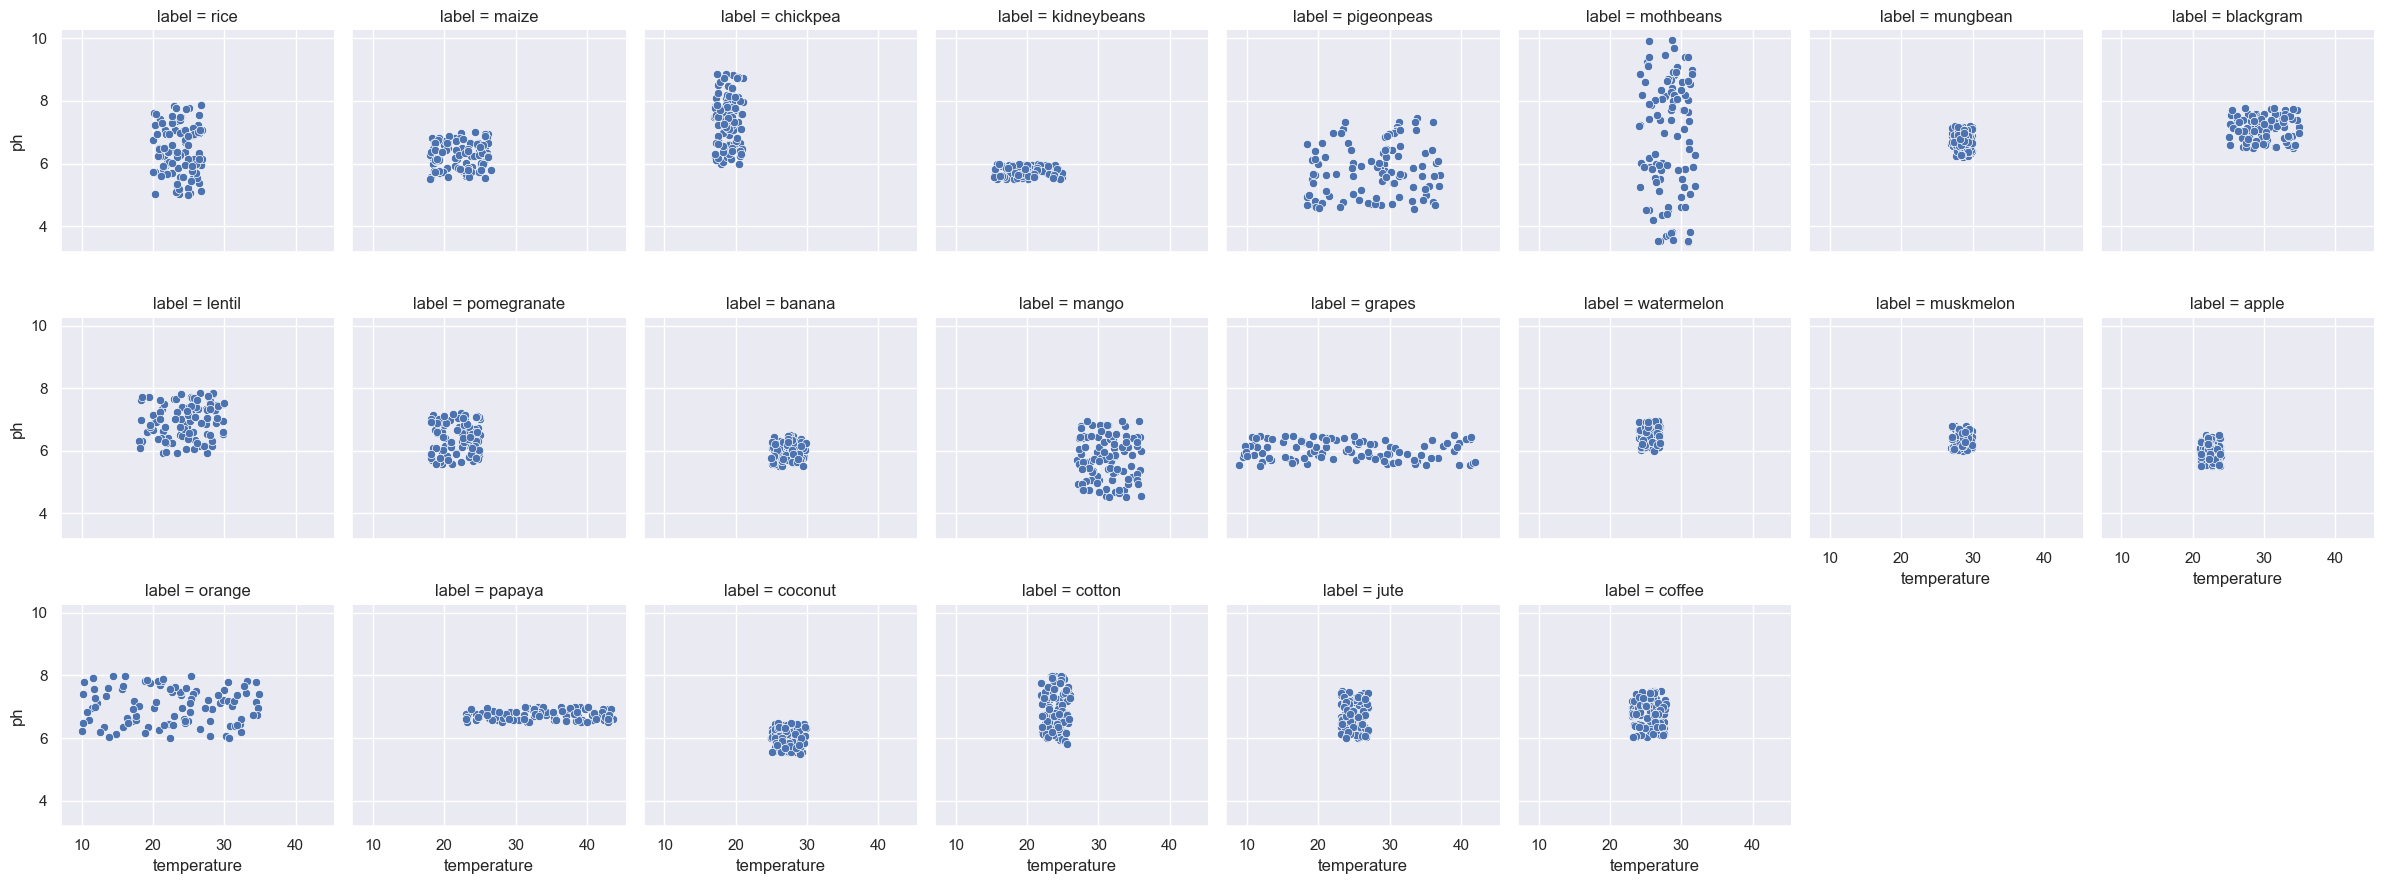

In [89]:
bgrid = sns.FacetGrid(crop_raw, col="label", col_wrap=8)
grid.map(sns.scatterplot, "temperature", "ph")

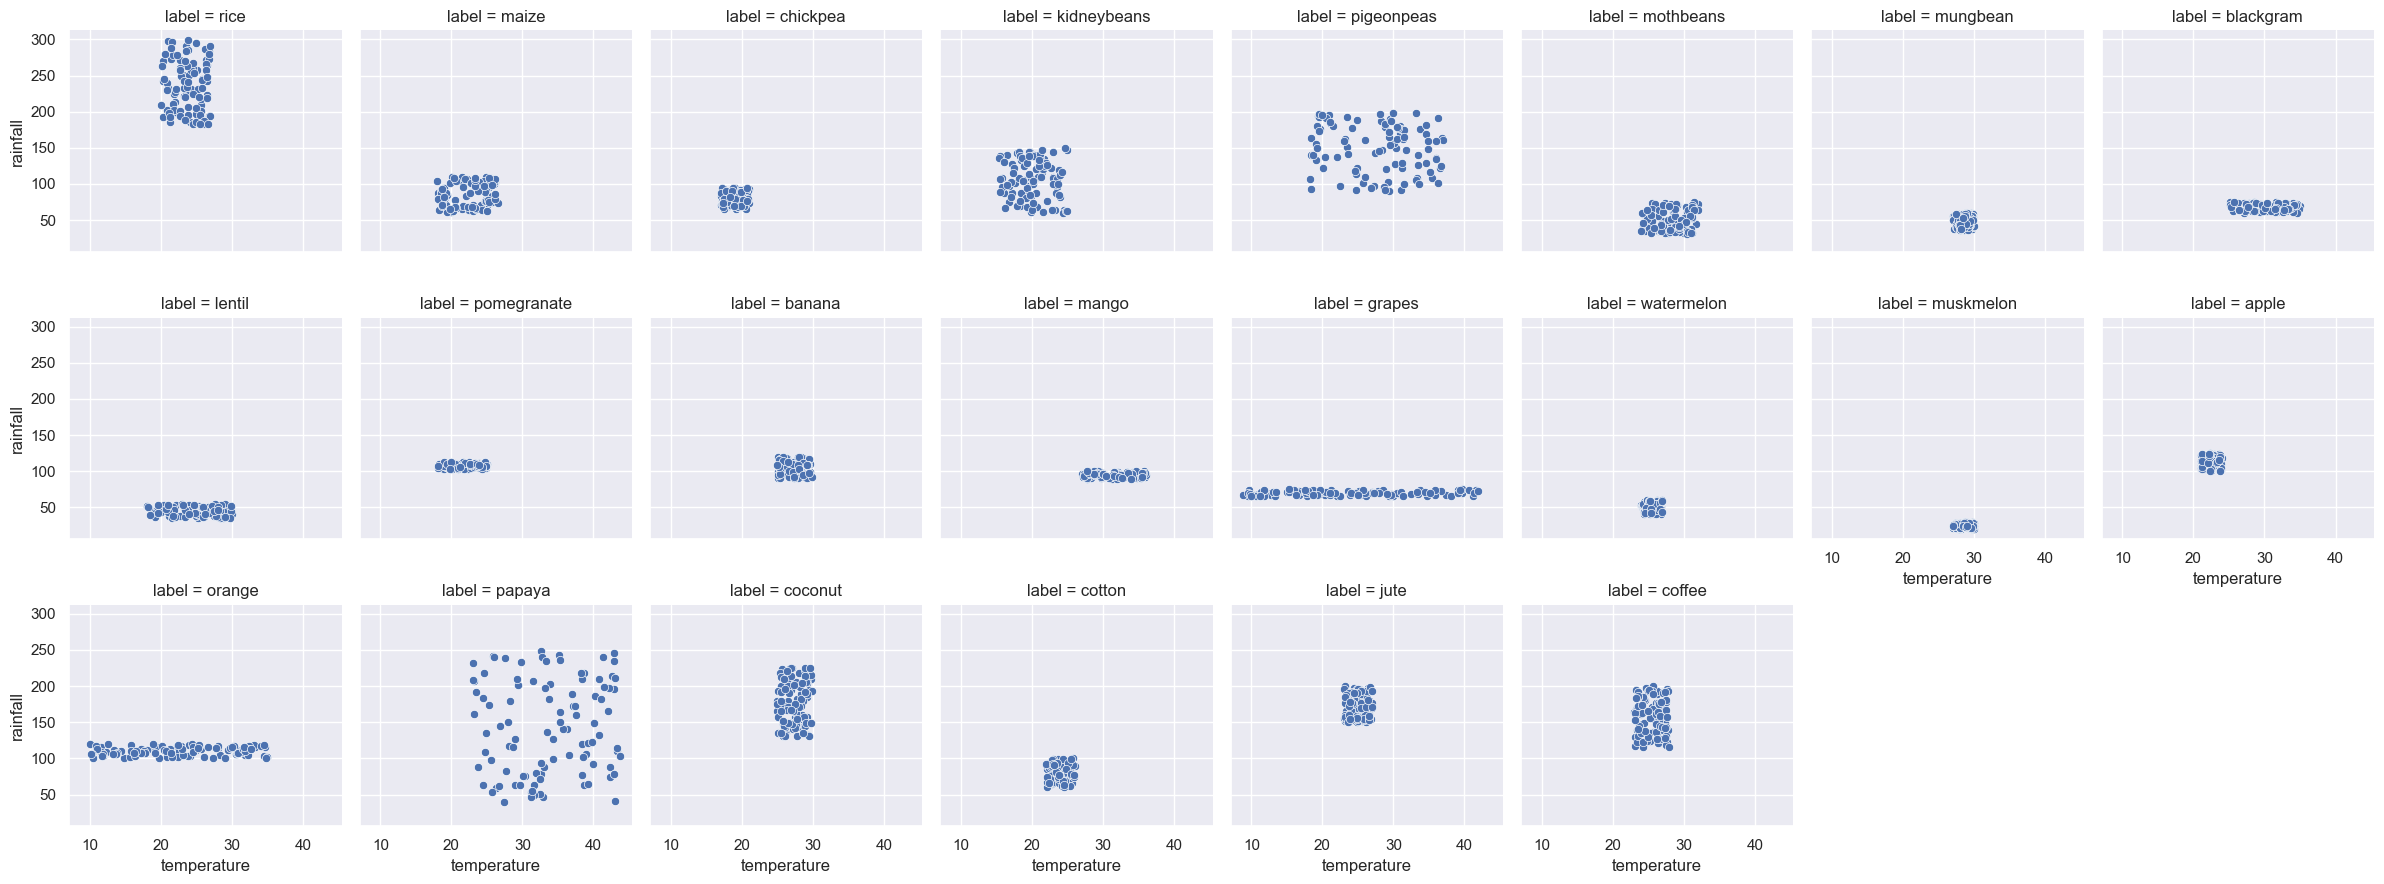

In [90]:
grid = sns.FacetGrid(crop_raw, col="label", col_wrap=8)
grid.map(sns.scatterplot, "temperature", "rainfall")

#### Correlation heatmap

<Axes: >

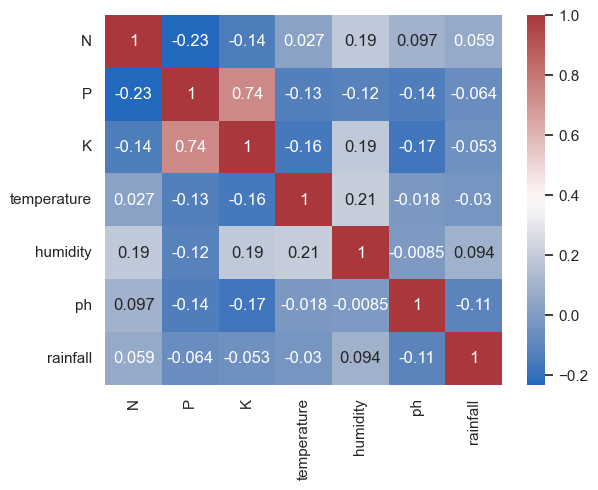

In [104]:
numvars = crop_raw.select_dtypes([float, int])
sns.heatmap(numvars.corr(), cmap="vlag", annot=True)

## (4) Statistical analysis

In [132]:
crops = list(crop_raw.label.drop_duplicates())


def anova_crop(var):
    samples = [list(crop_raw[crop_raw["label"] == i][var]) for i in crops]
    anova_stats = scipy.stats.f_oneway(*samples)
    print(f"{var}: {anova_stats=}")


anova_crop("humidity")
anova_crop("ph")
anova_crop("temperature")
anova_crop("rainfall")

humidity: anova_stats=F_onewayResult(statistic=3103.708891217461, pvalue=0.0)
ph: anova_stats=F_onewayResult(statistic=60.344033529413736, pvalue=6.493161898840499e-199)
temperature: anova_stats=F_onewayResult(statistic=102.18698122995393, pvalue=4.019323818173197e-305)
rainfall: anova_stats=F_onewayResult(statistic=605.5279661441423, pvalue=0.0)
